## Libraries and functions

In [1]:
# 词云
import  jieba   #jieba分词包  
from PIL import Image #图片的处理
import matplotlib.pyplot as plt # 主要进行词云绘图
from wordcloud import WordCloud  #词云
import matplotlib.colors as colors
from collections import Counter
import xlwt
import docx

from os import path
import os
from wordcloud import STOPWORDS, ImageColorGenerator

# 导入中文字体
import matplotlib
print(matplotlib.matplotlib_fname())
import matplotlib.font_manager
matplotlib.font_manager._rebuild()
[f for f in matplotlib.font_manager.fontManager.ttflist if 'Heiti' in f.name]
matplotlib.rcParams['font.family'] = ['Heiti TC']

import pandas as pd
import numpy as np
import seaborn as sns

/Users/littletrista/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc


In [2]:
#把连在一起的句子分开（评论）
def fenJu(text):
    juzi=[]
    start=0
    end=0
    for i in range(len(text)):
        if text[i]=='\n':
            end=i+1
            juzi.append(text[start:end])
            start=i+1
    return juzi

#提取含有特定词的句子
def tiQu(juzi,ci):
    output=''
    count=0
    for i in range(len(juzi)):
        if juzi[i].find(ci)>=0:
            output=output+str(count+2)+'.'+juzi[i]
            count=count+1
    return count,output

#建立一个快速处理多个词频的函数，输出评论数，并把评论都提取出来
def multiTiqu(aList, diZhi):
    for i in aList:
        output=tiQu(juzi,i)
        #创建Word文档
        doc = docx.Document()
        #写入Word文档
        doc.add_paragraph(output[1])
        #保存Word文档
        doc.save(diZhi+'%d' % output[0]+'-'+i+".docx")
        
#提取含有【一类词】中任意一个词的评论
def yiLeiCi(juzi,aList,diZhi):
    output=''
    count=0
    aList=['油','贵']
    for i in range(len(juzi)):
        for j in range(len(aList)):
            if juzi[i].find(aList[j])>=0:
                output=output+str(count+2)+'.'+juzi[i]
                count=count+1
                break
    #创建Word文档
    doc = docx.Document()
    #写入Word文档
    doc.add_paragraph(output)
    #保存word文档
    name = aList[0]
    for i in range(1,len(aList)):
        name = name + '&' + aList[i]
    doc.save(diZhi+'%d' % count+'-'+name+".docx")

## 自然之宝

### 发肤甲

In [3]:
comment=pd.read_excel('自然之宝-发肤甲.xlsx').fillna('0')
comment.head(1)

,商品ID,评论ID,用户昵称,颜色分类,追评时间,追评内容,追评天数,评论内容,评论时间
0,602910001951,1131441356339,何***0,颜色分类:草莓味【日期新鲜】,0,0,0,好评,2021-05-10 18:05:15


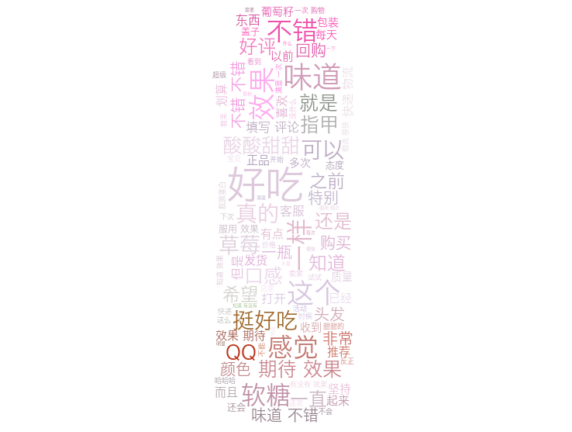

In [6]:
pinglun=comment['评论内容'][0]
for i in range(1,len(comment['评论内容'])):
    pinglun=pinglun+'\n'+comment['评论内容'][i]
    
wordlist = list(jieba.cut(pinglun))
wordlist = [word for word in wordlist if len(word)>1]

#该条将分好的列表词，转为空格分隔的字符串
word = " ".join(wordlist)
#返回word这个键对应的值，只要是出现的单词都默认值为1，下次如果再遇到就加1
counts={}
for i in wordlist:
    counts[i]=counts.get(i,1)+1
#将字典中的值都放入列表中，得到一个元组类型的列表
items=list(counts.items())
def takeSecond(elem):
    return elem[1]
#对列表大到小排序
#lambda关键字表示按照后面指定的方式进行排序，这里表示元组中的第二个元素，也就是单词出现的次数
items.sort(key=takeSecond,reverse=True) 
#列表转为字典
itemsDict = {}
for i in range(len(items)):
    itemsDict[items[i][0]] = items[i][1]
#导出词频
cipin = pd.DataFrame.from_dict(itemsDict, orient='index')
#存入Excel中
writer=pd.ExcelWriter('/Users/littletrista/Desktop/PE/自然之宝/自然之宝-发肤甲词云.xlsx')
cipin.to_excel(writer,sheet_name='词频')
writer.save()

juzi = fenJu(pinglun)
aList = []
for i in itemsDict:
    if itemsDict[i] < 15 :
        break
    else:
        aList.append(i)
diZhi = '/Users/littletrista/Desktop/PE/自然之宝/自然之宝-发肤甲/ '
multiTiqu(aList, diZhi)

with open('自然之宝-发肤甲词云.txt','w') as f:
    f.write(word)
    
coffee_mask=np.array(Image.open('/Users/littletrista/Desktop/PE/自然之宝/词云背景/自然之宝-发肤甲词云背景.png'))

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["hellip",'用户','没有','好好'])

# Set colors
color_list=['brown','orange']
colormap=colors.ListedColormap(color_list)

# Create and generate a word cloud image:
txt = open("自然之宝-发肤甲词云.txt", "r", encoding="utf-8").read()
wordcloud = WordCloud(mask=coffee_mask,
                      font_path="Hiragino Sans GB.ttc",
                      max_font_size=50, max_words=100,
                      colormap=colormap,
                      stopwords=stopwords,
                      background_color="white").generate(txt)

# create coloring from image
image_colors = ImageColorGenerator(coffee_mask)

# Display the generated image:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud.recolor(color_func=image_colors),interpolation='bilinear')
#plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
#plt.show()

# store to file
plt.savefig("自然之宝-发肤甲词云.png", format="png")

### 复合维他命

In [7]:
comment=pd.read_excel('自然之宝-复合维他命.xlsx').fillna('0')
comment.head(1)

,商品ID,评论ID,用户昵称,颜色分类,追评时间,追评内容,追评天数,评论内容,评论时间
0,611573326204,1127262549409,r***n,具体规格:80粒,0,0,0,平时不评价，因为之前那一瓶撕开也是这样，没有多想，以为自己撕坏了，没想到这瓶也撕不开，严重怀...,2021-04-04 08:17:55


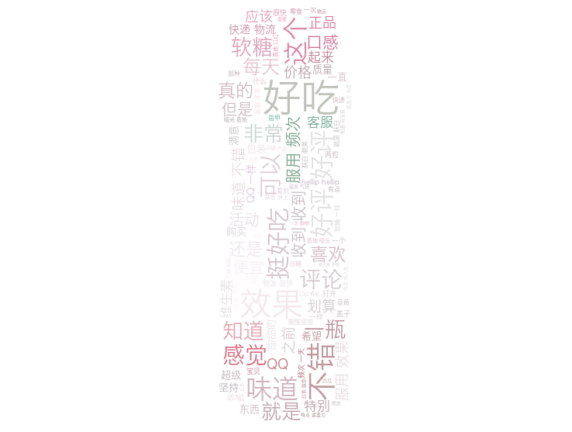

In [10]:
pinglun=comment['评论内容'][0]
for i in range(1,len(comment['评论内容'])):
    pinglun=pinglun+'\n'+comment['评论内容'][i]
    
wordlist = list(jieba.cut(pinglun))
wordlist = [word for word in wordlist if len(word)>1]

#该条将分好的列表词，转为空格分隔的字符串
word = " ".join(wordlist)
#返回word这个键对应的值，只要是出现的单词都默认值为1，下次如果再遇到就加1
counts={}
for i in wordlist:
    counts[i]=counts.get(i,1)+1
#将字典中的值都放入列表中，得到一个元组类型的列表
items=list(counts.items())
def takeSecond(elem):
    return elem[1]
#对列表大到小排序
#lambda关键字表示按照后面指定的方式进行排序，这里表示元组中的第二个元素，也就是单词出现的次数
items.sort(key=takeSecond,reverse=True) 
#列表转为字典
itemsDict = {}
for i in range(len(items)):
    itemsDict[items[i][0]] = items[i][1]
#导出词频
cipin = pd.DataFrame.from_dict(itemsDict, orient='index')
#存入Excel中
writer=pd.ExcelWriter('/Users/littletrista/Desktop/PE/自然之宝/自然之宝-复合维他命词云.xlsx')
cipin.to_excel(writer,sheet_name='词频')
writer.save()

juzi = fenJu(pinglun)
aList = []
for i in itemsDict:
    if itemsDict[i] < 15 :
        break
    else:
        aList.append(i)
diZhi = '/Users/littletrista/Desktop/PE/自然之宝/自然之宝-复合维他命/ '
multiTiqu(aList, diZhi)

with open('自然之宝-复合维他命词云.txt','w') as f:
    f.write(word)
    
coffee_mask=np.array(Image.open('/Users/littletrista/Desktop/PE/自然之宝/词云背景/自然之宝-复合维他命词云背景.png'))

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["填写",'用户','没有','哈哈哈','hellip'])

# Set colors
color_list=['brown','orange']
colormap=colors.ListedColormap(color_list)

# Create and generate a word cloud image:
txt = open("自然之宝-复合维他命词云.txt", "r", encoding="utf-8").read()
wordcloud = WordCloud(mask=coffee_mask,
                      font_path="Hiragino Sans GB.ttc",
                      max_font_size=50, max_words=100,
                      colormap=colormap,
                      stopwords=stopwords,
                      background_color="white").generate(txt)

# create coloring from image
image_colors = ImageColorGenerator(coffee_mask)

# Display the generated image:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud.recolor(color_func=image_colors),interpolation='bilinear')
#plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
#plt.show()

# store to file
plt.savefig("自然之宝-复合维他命词云.png", format="png")

## Swisse

### 血橙精华

In [11]:
comment=pd.read_excel('swisse-血橙精华.xlsx').fillna('0')
comment.head(1)

,商品ID,评论ID,用户昵称,颜色分类,追评时间,追评内容,追评天数,评论内容,评论时间
0,527034325527,1131828441912,背***j,颜色分类:500ml,0,0,0,活动价格太不稳定了，刚收货了就发现价格又低了,2021-05-10 11:36:59


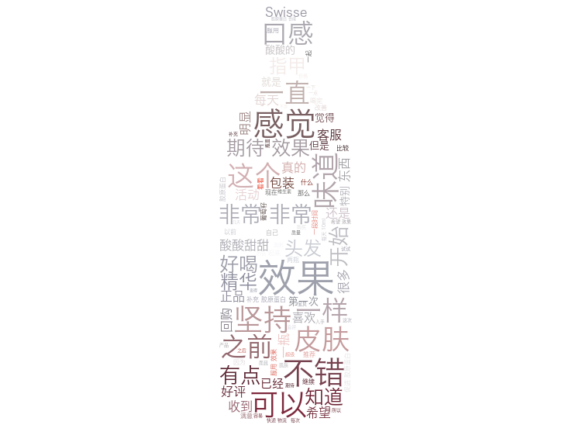

In [17]:
pinglun=comment['评论内容'][0]
for i in range(1,len(comment['评论内容'])):
    pinglun=pinglun+'\n'+comment['评论内容'][i]
    
wordlist = list(jieba.cut(pinglun))
wordlist = [word for word in wordlist if len(word)>1]

#该条将分好的列表词，转为空格分隔的字符串
word = " ".join(wordlist)
#返回word这个键对应的值，只要是出现的单词都默认值为1，下次如果再遇到就加1
counts={}
for i in wordlist:
    counts[i]=counts.get(i,1)+1
#将字典中的值都放入列表中，得到一个元组类型的列表
items=list(counts.items())
def takeSecond(elem):
    return elem[1]
#对列表大到小排序
#lambda关键字表示按照后面指定的方式进行排序，这里表示元组中的第二个元素，也就是单词出现的次数
items.sort(key=takeSecond,reverse=True) 
#列表转为字典
itemsDict = {}
for i in range(len(items)):
    itemsDict[items[i][0]] = items[i][1]
#导出词频
cipin = pd.DataFrame.from_dict(itemsDict, orient='index')
#存入Excel中
writer=pd.ExcelWriter('/Users/littletrista/Desktop/PE/自然之宝/swisse-血橙精华词云.xlsx')
cipin.to_excel(writer,sheet_name='词频')
writer.save()

juzi = fenJu(pinglun)
aList = []
for i in itemsDict:
    if itemsDict[i] < 15 :
        break
    else:
        aList.append(i)
diZhi = '/Users/littletrista/Desktop/PE/自然之宝/swisse-血橙精华/ '
multiTiqu(aList, diZhi)

with open('swisse-血橙精华词云.txt','w') as f:
    f.write(word)
    
coffee_mask=np.array(Image.open('/Users/littletrista/Desktop/PE/自然之宝/词云背景/swisse-血橙精华词云背景.png'))

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["填写",'用户','没有','好好','hellip','评论'])

# Set colors
color_list=['brown','orange']
colormap=colors.ListedColormap(color_list)

# Create and generate a word cloud image:
txt = open("swisse-血橙精华词云.txt", "r", encoding="utf-8").read()
wordcloud = WordCloud(mask=coffee_mask,
                      font_path="Hiragino Sans GB.ttc",
                      max_font_size=50, max_words=100,
                      colormap=colormap,
                      stopwords=stopwords,
                      background_color="white").generate(txt)

# create coloring from image
image_colors = ImageColorGenerator(coffee_mask)

# Display the generated image:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud.recolor(color_func=image_colors),interpolation='bilinear')
#plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
#plt.show()

# store to file
plt.savefig("swisse-血橙精华词云.png", format="png")

### 复合维他命

In [18]:
comment=pd.read_excel('swisse-复合维他命.xlsx').fillna('0')
comment.head(1)

,商品ID,评论ID,用户昵称,颜色分类,追评时间,追评内容,追评天数,评论内容,评论时间
0,551789942646,1131714713955,c***g,0,0,0,0,超划算,2021-05-09 13:35:51


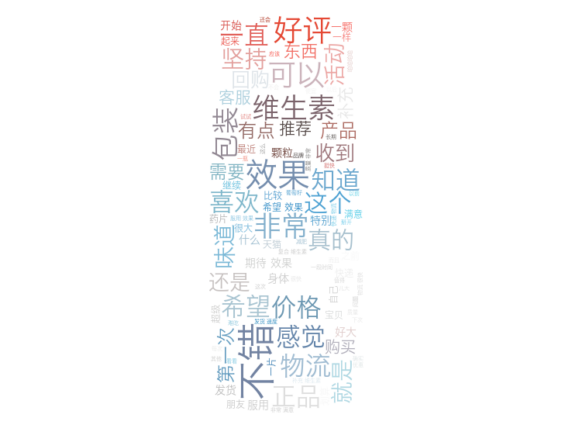

In [22]:
pinglun=comment['评论内容'][0]
for i in range(1,len(comment['评论内容'])):
    pinglun=pinglun+'\n'+comment['评论内容'][i]
    
wordlist = list(jieba.cut(pinglun))
wordlist = [word for word in wordlist if len(word)>1]

#该条将分好的列表词，转为空格分隔的字符串
word = " ".join(wordlist)
#返回word这个键对应的值，只要是出现的单词都默认值为1，下次如果再遇到就加1
counts={}
for i in wordlist:
    counts[i]=counts.get(i,1)+1
#将字典中的值都放入列表中，得到一个元组类型的列表
items=list(counts.items())
def takeSecond(elem):
    return elem[1]
#对列表大到小排序
#lambda关键字表示按照后面指定的方式进行排序，这里表示元组中的第二个元素，也就是单词出现的次数
items.sort(key=takeSecond,reverse=True) 
#列表转为字典
itemsDict = {}
for i in range(len(items)):
    itemsDict[items[i][0]] = items[i][1]
#导出词频
cipin = pd.DataFrame.from_dict(itemsDict, orient='index')
#存入Excel中
writer=pd.ExcelWriter('/Users/littletrista/Desktop/PE/自然之宝/swisse-复合维他命词云.xlsx')
cipin.to_excel(writer,sheet_name='词频')
writer.save()

juzi = fenJu(pinglun)
aList = []
for i in itemsDict:
    if itemsDict[i] < 15 :
        break
    else:
        aList.append(i)
diZhi = '/Users/littletrista/Desktop/PE/自然之宝/swisse-复合维他命/ '
multiTiqu(aList, diZhi)

with open('swisse-复合维他命词云.txt','w') as f:
    f.write(word)
    
coffee_mask=np.array(Image.open('/Users/littletrista/Desktop/PE/自然之宝/词云背景/swisse-复合维他命词云背景.png'))

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["填写",'用户','没有','哈哈哈','hellip','评论'])

# Set colors
color_list=['brown','orange']
colormap=colors.ListedColormap(color_list)

# Create and generate a word cloud image:
txt = open("swisse-复合维他命词云.txt", "r", encoding="utf-8").read()
wordcloud = WordCloud(mask=coffee_mask,
                      font_path="Hiragino Sans GB.ttc",
                      max_font_size=50, max_words=100,
                      colormap=colormap,
                      stopwords=stopwords,
                      background_color="white").generate(txt)

# create coloring from image
image_colors = ImageColorGenerator(coffee_mask)

# Display the generated image:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud.recolor(color_func=image_colors),interpolation='bilinear')
#plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
#plt.show()

# store to file
plt.savefig("swisse-复合维他命词云.png", format="png")